<a href="https://colab.research.google.com/github/BenedettaPasqualettounivr/Project/blob/main/Disney%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
disney_plus_titles_df = pd.read_csv('disney_plus_titles.csv')

#DATA EXPLORATION


In [ ]:
#To see the number of elements in each dimension
disney_plus_titles_df.shape

(18378, 1)

In [ ]:
#Visualization of the dataset
disney_plus_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [ ]:
disney_plus_titles_df.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [ ]:
#To see the type of the element in each column
disney_plus_titles_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#To see the coherence from the bottom to the end of the dataset
disney_plus_titles_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [ ]:
disney_plus_titles_df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


In [ ]:
#To see the sum of null cells
disney_plus_titles_df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
disney_plus_titles_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [ ]:
#Chronological order
disney_plus_titles_df.sort_values('release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1220,s1221,Movie,Steamboat Willie,"Walt Disney, Ub Iwerks",Walt Disney,United States,"November 12, 2019",1928,TV-Y7,8 min,"Animation, Family, Kids",Watch Mickey Mouse's classic cartoon debut. Se...
893,s894,Movie,Flowers and Trees,Burt Gillett,NaN,United States,"November 12, 2019",1932,TV-Y7,8 min,"Animation, Family, Kids","It's spring, and the flowers, mushrooms, and t..."
1178,s1179,Movie,Santa's Workshop,Wilfred Jackson,NaN,United States,"November 12, 2019",1932,TV-G,7 min,"Animation, Family, Fantasy",Santa and his elves make toys to deliver on Ch...
736,s737,Movie,Babes in the Woods,Burt Gillett,NaN,United States,"November 12, 2019",1932,TV-Y7,8 min,"Animation, Family, Fantasy",Two children wander the forest and get lured i...
1317,s1318,Movie,The Pied Piper,Wilfred Jackson,NaN,United States,"November 12, 2019",1933,TV-G,8 min,"Animation, Family, Musical",The Pied Piper lures the children out of town....
...,...,...,...,...,...,...,...,...,...,...,...,...
148,s149,TV Show,Mickey Mouse Funhouse,NaN,"Bret Iwan, Kaitlyn Robrock, Bill Farmer, Tony ...",United States,"July 28, 2021",2021,TV-Y,1 Season,"Animation, Kids",Mickey Mouse Funhouse is filled with silly adv...
145,s146,TV Show,Chip 'n' Dale: Park Life,NaN,"Matthew Géczy, Kaycie Chase, Bill Farmer, Sylv...",NaN,"July 28, 2021",2021,TV-Y7,1 Season,"Animation, Buddy, Comedy",Two tiny chipmunks have huge adventures while ...
143,s144,Movie,Built for Mars: The Perseverance Rover,Mark J Davis,Steven French,NaN,"July 30, 2021",2021,TV-PG,88 min,Documentary,BUILT FOR MARS: THE PERSEVERANCE ROVER follows...
139,s140,Movie,Killer Shark vs Killer Whale,NaN,Edward Marcoux,NaN,"August 6, 2021",2021,TV-14,44 min,"Animals & Nature, Documentary",Orcas attack white sharks for their livers lea...


In [ ]:
#Which is the more productive year for Disney? 
Ordered_list = disney_plus_titles_df['release_year'].value_counts()
print('The more productive year for Disney is', Ordered_list.index[0], 'since', max(Ordered_list), 'products were released.')

The more productive year for Disney is 2021 since 125 products were released.


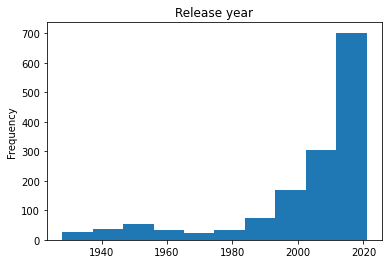

In [ ]:
disney_plus_titles_df['release_year'].plot(kind = 'hist', title = 'Release year')

In [ ]:
#Show how much Movies and TV Shows are in the dataset
disney_products = disney_plus_titles_df['type'].value_counts()
print(disney_products['Movie'])
disney_products.to_frame()

1052


,type
Movie,1052
TV Show,398


In [ ]:
#Calculate the percentage of Movies and TV Shows
nr_movies = disney_products['Movie']
nr_tvshows = disney_products['TV Show']
total = nr_movies + nr_tvshows
print('The percetage of Movies is', round((nr_movies/total)*100,1), '%')
print('The percetage of TV shows is', round((nr_tvshows/total)*100,1), '%')

The percetage of Movies is 72.6 %
The percetage of TV shows is 27.4 %


In [ ]:
values = disney_plus_titles_df['type'].value_counts()
keys = disney_plus_titles_df['type'].unique()
fig = go.Figure(go.Pie(title='Movies and TV shows', values= values, labels = keys, hole = 0.3))
fig.show()

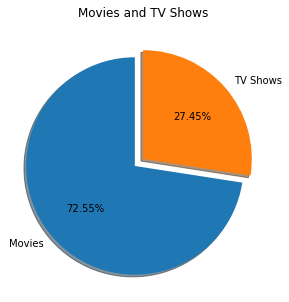

In [ ]:
labels = {'Movies', 'TV Shows'}
count = [1052, 398]
plt.figure(figsize = (9,5))
explode = (0.1,0)
plt.pie(count, explode = explode, labels = labels, autopct = '%.2f%%', startangle = 90, shadow = True)
plt.title('Movies and TV Shows')
plt.show()

In [ ]:
Movie = disney_plus_titles_df.groupby(['type']).count()
print(Movie)

         show_id  title  director  ...  duration  listed_in  description
type                               ...                                  
Movie       1052   1052       977  ...      1052       1052         1052
TV Show      398    398         0  ...       398        398          398

[2 rows x 11 columns]


In [ ]:
#In order to have the dataset more clear, we keep only the columns we need
disney_2021 = disney_plus_titles_df.drop(columns=['show_id', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description'])
disney_2021

,type,release_year
0,Movie,2016
1,Movie,1988
2,Movie,2011
3,Movie,2021
4,TV Show,2021
...,...,...
1445,Movie,2009
1446,Movie,2009
1447,Movie,2016
1448,Movie,2003


In [ ]:
#Now it's analyze the release year
disney_2021.sort_values('release_year')

,type,release_year
1220,Movie,1928
893,Movie,1932
1178,Movie,1932
736,Movie,1932
1317,Movie,1933
...,...,...
148,TV Show,2021
145,TV Show,2021
143,Movie,2021
139,Movie,2021


In [ ]:
disney_2021['release_year'].value_counts()

2021    125
2020    114
2019     99
2017     69
2018     65
       ... 
1928      1
1944      1
1970      1
1945      1
1968      1
Name: release_year, Length: 90, dtype: int64

In [ ]:
disney_2021['release_year'].describe()

count    1450.000000
mean     2003.091724
std        21.860162
min      1928.000000
25%      1999.000000
50%      2011.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

In [ ]:
mask_relaese_year = disney_2021['release_year'] == 2021

In [ ]:
disney_count = disney_2021[mask_relaese_year].groupby(['type']).count()
print('In the last year were released')
print(disney_count)

In the last year were released
         release_year
type                 
Movie              70
TV Show            55


In [ ]:
#In which month were added more products?
disney_date = disney_plus_titles_df['date_added']
disney_date.to_frame()

,date_added
0,2021-11-26
1,2021-11-26
2,2021-11-26
3,2021-11-26
4,2021-11-25
...,...
1445,2021-06-04
1446,2021-04-02
1447,2020-12-18
1448,2020-09-18


In [ ]:
#To better analyze the dates, the the strings are changed into numbers
disney_nr = disney_plus_titles_df['date_added'] = pd.to_datetime(disney_plus_titles_df['date_added'], format = "%B %d, %Y")
disney_nr.dropna(inplace = True)
disney_nr.to_frame()

,date_added
0,2021-11-26
1,2021-11-26
2,2021-11-26
3,2021-11-26
4,2021-11-25
...,...
1445,2021-06-04
1446,2021-04-02
1447,2020-12-18
1448,2020-09-18


In [ ]:
disney_month = disney_plus_titles_df['month'].value_counts()
print('The most productive month is', disney_month.index[0], 'since were released', max(disney_month), 'programs.') 

The most productive month is 11.0 since were released 809 programs.


In [ ]:
#Graphical visualization of the months of publication
disney_plus_titles_df['month'] = disney_plus_titles_df['date_added'].dt.month.fillna(0)
fig = px.histogram(disney_plus_titles_df['release_year'], color = disney_plus_titles_df['month'], nbins = 100, title = 'Months of publication')
fig.show()

In [ ]:
#Which is the most popular kind of products?
disney_kind = disney_plus_titles_df['listed_in'].value_counts()

In [ ]:
print('The most popular kind of programs is', disney_kind.index[0]) 

The most popular kind of programs is Animation, Comedy, Family


In [ ]:
#Which is the most popular genre of Movies and of Tv Shows?
disney_kind_movies = disney_plus_titles_df['listed_in'].value_counts('Movie')
disney_kind_Tvshows = disney_plus_titles_df['listed_in'].value_counts('TV shows')
print('The most popular kind of Movies is ', disney_kind_movies.index[0], 'and for TV shows is', disney_kind_Tvshows.index[0])

The most popular kind of Movies is  Animation, Comedy, Family and for TV shows is Animation, Comedy, Family


In [ ]:
#Graphical visualization of the genre of Movies and TV Shows
genre_count = disney_plus_titles_df.copy()
genre_count = pd.concat([genre_count, disney_plus_titles_df['listed_in'].str.split(',', expand=True)])
genre_count = genre_count.melt(id_vars = ['type', 'title'], value_vars = range(3), value_name = 'genre')
genre_count = genre_count[genre_count['genre'].notna()]

In [ ]:
fig = px.histogram(data_frame = genre_count, x = ['genre'], title = "Genre of Movies and TV Shows")
fig.show()

In [ ]:
#Which is the most popular rating?
disney_rating = disney_plus_titles_df['rating'].value_counts()
disney_rating.dropna(inplace = True)
print('The most rated program is', disney_rating.index[0])

The most rated program is TV-G


In [ ]:
#Graphical visualization of the most popular rating
fig = px.bar(data_frame= disney_rating, x = 'rating', title = "Ratings of the Movies and TV-shows")
fig.show()

In [ ]:
#Graphical visualization of the most rating divided into Movies and TV Shows
fig = px.histogram(data_frame = disney_plus_titles_df, x = ['rating'], color = 'type', title = "Ratings of Movies and TV Shows")
fig.show()

In [ ]:
#In which country were released more products?
disney_country = disney_plus_titles_df['country']
disney_country.dropna(inplace = True)
country = disney_country.value_counts().to_frame()

print('The Country where Disney released more products is', country.index[0], 'since there are published', max(country['country']))

The Country where Disney released more products is United States since there are published 1005


In [ ]:
#Graphical visualization of the countries where were released more products
country_count = disney_plus_titles_df.copy()
country_count = pd.concat([country_count, disney_plus_titles_df['country'].str.split(',', expand=True)])
country_count = country_count.melt(id_vars = ['type', 'title'], value_vars = range(15), value_name = 'country')
country_count = country_count[country_count['country'].notna()]
fig = px.histogram(data_frame=country_count, x = 'country', title = 'Country release count').update_xaxes(categoryorder = 'total descending')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.



In [ ]:
#Which are the 10 most productive directors?
disney_directors = disney_plus_titles_df['director']
disney_directors.dropna(inplace = True)
disney_10_directors = disney_directors.value_counts()
disney_10_directors[0:10]
names = [name for name in disney_10_directors.index[0:10]]
print('The 10 most productive directors are:', ', '.join(names))

The 10 most productive directors are: Jack Hannah, John Lasseter, Paul Hoen, Robert Stevenson, Charles Nichols, Vincent McEveety, Bob Peterson, James Algar, Kenny Ortega, Wilfred Jackson


In [ ]:
#Graphical visualization of the 10 most productive directors
keys = disney_plus_titles_df['director'].value_counts().keys().to_list()
values = disney_plus_titles_df['director'].value_counts().to_list()

fig = px.bar(x = keys[:10], y = values[:10], data_frame = disney_plus_titles_df, 
             title="Top 10 Directors", 
             labels = {'x': 'Directors', 'y': 'no of movies'})
fig.show()

#CLUSTERING

In [ ]:
from sklearn.cluster import KMeans